In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(url)
df.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
11,47.0,40.0,16.0,127.0,4.0,12.0,1.0,1.0,0.0,19.7,...,0.0,1.0,0.0,0.0,1.0,2.981,3.240,4.844,2.0,0.0
77,10.0,34.0,1.0,52.0,5.0,3.0,1.0,0.0,1.0,4.3,...,0.0,1.0,0.0,0.0,1.0,1.459,3.240,3.951,2.0,1.0
130,72.0,75.0,37.0,33.0,1.0,44.0,0.0,1.0,0.0,49.3,...,0.0,0.0,0.0,1.0,0.0,3.898,3.458,3.497,2.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.7,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
145,68.0,42.0,16.0,89.0,4.0,12.0,1.0,1.0,0.0,25.6,...,0.0,1.0,0.0,0.0,1.0,3.243,3.240,4.489,2.0,0.0


In [17]:
# Lets select few selective subset of data that take part in model building
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype(int)
churn_df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


In [18]:
# Splitting X and y subset of data
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])
X[:5], y[:5]

(array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
        [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
        [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
        [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
        [  7.,  35.,  14.,  80.,   2.,  15.,   0.]]),
 array([1, 1, 0, 0, 0]))

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance.

In [20]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Splitting data in training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

Building Logistic Regression Model

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Making Predictions

In [26]:
y_hat = model.predict(X_test)
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Finding probability class
`To understand this prediction, we can also have a look at the prediction probability of data point of the test data set. Use the function predict_proba , we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.`

In [51]:
y_proba = model.predict_proba(X_test)
y_proba[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

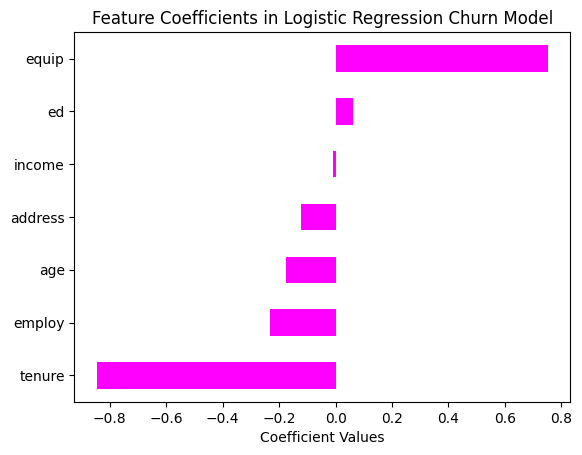

In [48]:
coefficients = pd.Series(model.coef_[0], churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh', color='magenta')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel('Coefficient Values')
plt.show()

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class.

## Calcuating Log Loss (Logarithmic Loss) or Binary Cross Entropy

In [76]:
log_loss = log_loss(y_true=y_test, y_pred = y_proba)
log_loss

0.6257718410257235

*Adding different features in the test and train dataset to find change in log_loss value*
* add the feature 'callcard' to the original set of input features, retrain model and find log_loss

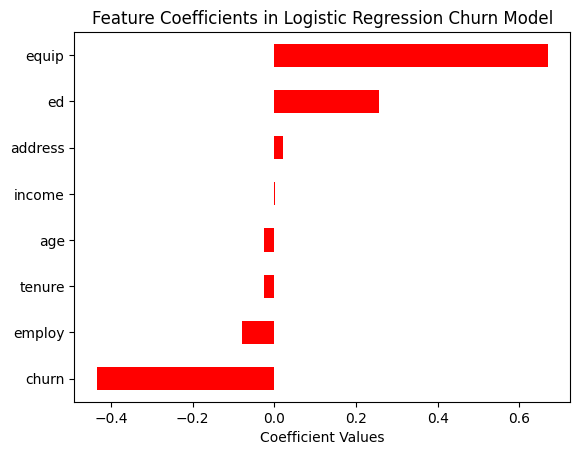

In [64]:
churn_df['callcard'] = df.callcard
X_1 = np.asarray(churn_df.drop(columns='churn'))
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.2, random_state=42)

models = LogisticRegression()
models.fit(X_train_1, y_train_1)

coefficients_1 = pd.Series(models.coef_[0], churn_df.columns[:-1])
coefficients_1.sort_values().plot(kind='barh', color='red')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel('Coefficient Values')
plt.show()

**Finding log_loss value**

In [65]:
y_hat_1 = models.predict(X_test_1)
y_hat_1[:5]

array([1, 1, 0, 0, 0])

In [66]:
y_hat_proba = models.predict_proba(X_test_1)
y_hat_proba[:5]

array([[0.4768508 , 0.5231492 ],
       [0.17211904, 0.82788096],
       [0.80763414, 0.19236586],
       [0.69624417, 0.30375583],
       [0.78578654, 0.21421346]])

In [75]:
from sklearn.metrics import log_loss
log_loss_1 = log_loss(y_true=y_test, y_pred = y_hat_proba)
log_loss_1

0.8641830067698659

**Lets try adding two more features `wireless` and `equip` and retrain the model as well as find new log_loss**

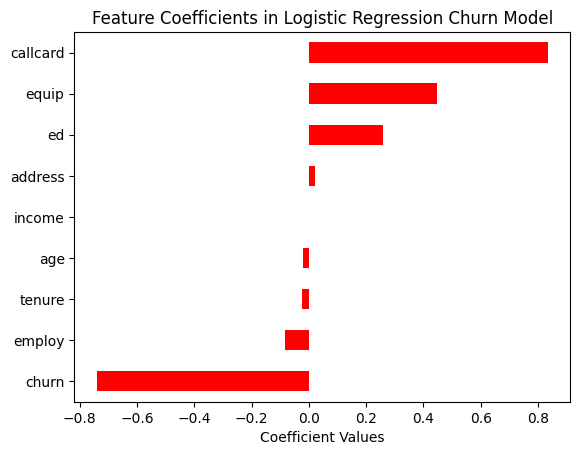

In [79]:
churn_df['wireless'] = df.wireless
churn_df['equip'] = df.equip
X_2 = np.asarray(churn_df.drop(columns='churn'))
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

models_2 = LogisticRegression()
models_2.fit(X_train_2, y_train_2)

coefficients_2 = pd.Series(models_2.coef_[0], churn_df.columns[:-1])
coefficients_2.sort_values().plot(kind='barh', color='red')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel('Coefficient Values')
plt.show()

**Lets find log loss values**

In [80]:
y_hat_2 = models_2.predict(X_test_2)
y_hat_2[:5]

array([0, 1, 0, 0, 0])

In [81]:
y_hat_proba_2 = models_2.predict_proba(X_test_2)
y_hat_proba_2[:5]

array([[0.51984344, 0.48015656],
       [0.10222345, 0.89777655],
       [0.85860272, 0.14139728],
       [0.77350373, 0.22649627],
       [0.7984923 , 0.2015077 ]])

In [82]:
from sklearn.metrics import log_loss
log_loss_2 = log_loss(y_true=y_test, y_pred = y_hat_proba_2)
log_loss_2

0.9192353673602158